## Задача 1

Даны значения величины заработной платы заемщиков банка (salary) и значения их поведенческого кредитного скоринга (scoring):    salary = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]  
scoring = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]  
Используя только встроенные питоновские функции и структуры данных (т.е. без библиотек numpy, pandas и др.) найдите:
1. ковариацию этих двух величин,
2. коэффициент корреляции Пирсона.

Можно затем посчитать те же значения с использованием библиотек, чтобы проверить себя.

In [1]:
import numpy as np
import pandas as pd
from scipy import stats

=====================================================================================================================

In [2]:
def my_mean(for_calc):
    output = 0
    for i in for_calc:
        output += i
    return output / len(for_calc)

In [3]:
salary = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110]
scoring = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]

In [4]:
def my_cov(x, y, ddof=0):
    x_diff = [(el - my_mean(x)) for el in x]
    y_diff = [(el - my_mean(y)) for el in y]    
    sum_of_diff = [(el[0] * el[1]) for el in zip(x_diff, y_diff)]
    output = 0
    for i in sum_of_diff:
        output += i
    return output / (len(sum_of_diff) - ddof)

In [5]:
my_cov(salary, scoring, ddof=1)

10175.377777777778

In [6]:
np.cov(np.array(salary), np.array(scoring), ddof=1)

array([[ 3882.93333333, 10175.37777778],
       [10175.37777778, 33854.32222222]])

Найдем коэффициент корреляции Пирсона, для этого необходимо составить фомулу для СКО

In [7]:
def my_std(x, ddof=0):
    x_diff = [(el - my_mean(x)) ** 2 for el in x]
    output = 0
    for el in x_diff:
        output += el
    output = output / (len(x_diff) - ddof)
    return output ** 0.5

In [8]:
salary_std = my_std(salary, ddof=1)
score_std = my_std(scoring, ddof=1)

In [9]:
print(f"Коэффициент корреляции Пирсона равен {my_cov(salary, scoring, ddof=1) / (salary_std * score_std)}")

Коэффициент корреляции Пирсона равен 0.8874900920739162


In [10]:
np.corrcoef(np.array(salary), np.array(scoring))

array([[1.        , 0.88749009],
       [0.88749009, 1.        ]])

## Задача 2

Проведите тест на значимость коэффициента корреляции Пирсона, найденного в предыдущей задаче. Что для этого нужно знать:
* Нулевая гипотеза: реальный коэффициент корреляции равен 0. Альтернативная гипотеза двухсторонняя.
* Статистика: t = r * sqrt(n - 2) / sqrt(1 - r ** 2), где r - коэффициент корреляции Пирсона, посчитанный по выборке.
* В предположении верности нулевой гипотезы эта статистика имеет распределение Стьюдента с параметром df = n - 2.

=================================================================================================================

In [11]:
pearson_coeff = my_cov(salary, scoring, ddof=1) / (salary_std * score_std)

In [12]:
t = (pearson_coeff * ((len(salary) - 2) ** 0.5)) / (1 - pearson_coeff ** 2) ** 0.5
t

5.447168150485575

In [13]:
lower = stats.t(df = (len(salary) - 2)).ppf(0.025)
higher = stats.t(df = (len(salary) - 2)).ppf(0.975)

In [14]:
lower <= t <= higher

False

In [15]:
lower

-2.306004135033371

In [16]:
higher

2.3060041350333704

С уровнем значимости 5% гипотезу о том, что коэффициент корреляции равен нулю, можно отвергнуть.

=======================================================================================================================

## Задача 3

Измерены значения IQ выборки студентов, обучающихся в местных технических вузах:

131, 125, 115, 122, 131, 115, 107, 99, 125, 111

Известно, что в генеральной совокупности IQ распределен нормально. Найдите доверительный интервал для математического ожидания с надежностью 0.95.

================================================================================================================

Для того чтобы найти доверительный интервал для матождиания, нужно пользоваться тестом на t критерий, поскольку мы не знаем значения дисперсии генеральной совокупности. Для того чтобы рассчитать доверительный интервал воспользуемся следущей формулой
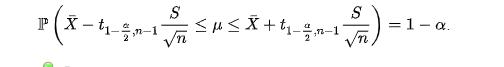

In [18]:
mean_iq = np.array([131, 125, 115, 122, 131, 115, 107, 99, 125, 111]).mean()
mean_iq

118.1

In [20]:
std_iq = np.array([131, 125, 115, 122, 131, 115, 107, 99, 125, 111]).std(ddof=1)
std_iq

10.54566788359614

In [23]:
conf_lower = mean_iq - stats.t(df=9).ppf(0.975) * (std_iq / (10 ** 0.5))
conf_lower

110.55608365158724

In [24]:
conf_upper = mean_iq + stats.t(df=9).ppf(0.975) * (std_iq / (10 ** 0.5))
conf_upper

125.64391634841274

In [25]:
print(f"Доверительный интервал для матоожидания составляет от {conf_lower} до {conf_upper}")

Доверительный интервал для матоожидания составляет от 110.55608365158724 до 125.64391634841274
